In [1]:
import os
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [2]:
im = plt.imread("./Rice_Image_Dataset/Basmati/basmati (10000).jpg")
im.shape

(250, 250, 3)

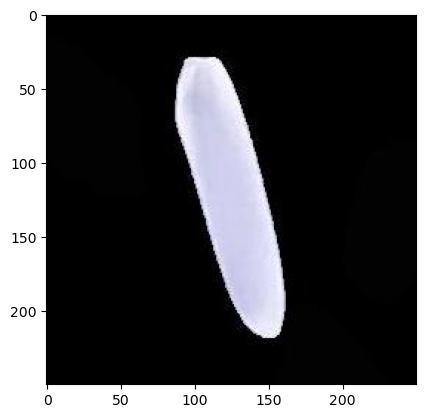

In [3]:
 im = Image.open("./Rice_Image_Dataset/Basmati/basmati (10000).jpg")
plt.imshow(im)

In [4]:
# function to load images from dataset to memory for building model
def Load_imgs(imagepath):
    # lists for storing images and labels of the respective image
    imgs = []
    label = []
    l1 = os.listdir(imagepath)
    for i in l1:
        if i!="Rice_Citation_Request.txt":
            l2 = os.listdir(imagepath+'/'+i)
            for j in l2:
                # opening image with path using Image.open()
                img = Image.open(imagepath+i+'/'+j)
                # resizing image to 32x32 size
                img = img.resize(size=(32,32))
                # changing image dimensions to 2D ie. gray scale
                img = img.convert('L')
                # adding image to imgs( list of all images )
                imgs.append(np.array(img))
                # adding label to label list 
                label.append(i)
                # deleting the loaded image 
                del img
    # returning two list: one with images and other with respective labels
    return np.array(imgs),label

In [5]:
# Loading images into 'x' and labels into 'y' using the function Load_imgs 
x,y = Load_imgs("./Rice_Image_Dataset/")

In [6]:
x.shape
#shape of 'x'

(75000, 32, 32)

In [7]:
target=pd.Series(y,dtype='category')
t = target.cat.codes

In [8]:
dicti = dict(enumerate(target.cat.categories))

In [9]:
print(dicti)

{0: 'Arborio', 1: 'Basmati', 2: 'Ipsala', 3: 'Jasmine', 4: 'Karacadag'}


In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,t,test_size=0.15,random_state=100,shuffle=True)
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size=0.3,random_state=100,shuffle=True)
train_x.shape,train_y.shape,valid_x.shape,valid_y.shape,test_x.shape,test_y.shape

((44625, 32, 32),
 (44625,),
 (19125, 32, 32),
 (19125,),
 (11250, 32, 32),
 (11250,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
# model.add(Dense(64,input_dim=train_x.shape[1],activation='relu',name='sh_dense1'))
# model.add(Dense(120,activation='relu'))
# model.add(Dense(256,activation='relu'))
# model.add(Dense(5,activation='softmax',name='sh_Dense2'))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

In [13]:
history=model.fit(train_x,train_y,batch_size=32,epochs=10,validation_data=(valid_x,valid_y),shuffle=True,verbose=1)

Epoch 1/10
1395/1395 [==============================] - 75s 53ms/step - loss: 0.2161 - accuracy: 0.9329 - val_loss: 0.0871 - val_accuracy: 0.9696
Epoch 2/10
1395/1395 [==============================] - 75s 54ms/step - loss: 0.1051 - accuracy: 0.9642 - val_loss: 0.1183 - val_accuracy: 0.9610
Epoch 3/10
1395/1395 [==============================] - 72s 51ms/step - loss: 0.0933 - accuracy: 0.9683 - val_loss: 0.0981 - val_accuracy: 0.9661
Epoch 4/10
1395/1395 [==============================] - 71s 51ms/step - loss: 0.0910 - accuracy: 0.9697 - val_loss: 0.1024 - val_accuracy: 0.9661
Epoch 5/10
1395/1395 [==============================] - 76s 55ms/step - loss: 0.0864 - accuracy: 0.9710 - val_loss: 0.0875 - val_accuracy: 0.9721
Epoch 6/10
1395/1395 [==============================] - 72s 52ms/step - loss: 0.0774 - accuracy: 0.9741 - val_loss: 0.0889 - val_accuracy: 0.9697
Epoch 7/10
1395/1395 [==============================] - 72s 51ms/step - loss: 0.0756 - accuracy: 0.9753 - val_loss: 0.0809 -

In [14]:
_, train_acc = model.evaluate(train_x, train_y)
_, test_acc = model.evaluate(test_x, test_y)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

352/352 [==============================] - 4s 11ms/step - loss: 0.0803 - accuracy: 0.9739
Train: 0.980, Test: 0.974


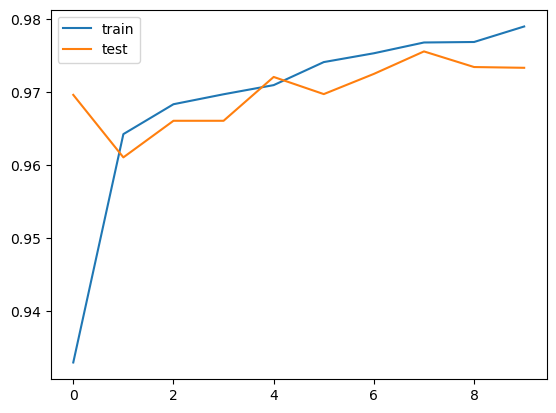

In [15]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [20]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((32,32)))
    x = x.reshape(1,32,32,1)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + dicti[classification])

99.99998807907104% Confidence Ipsala


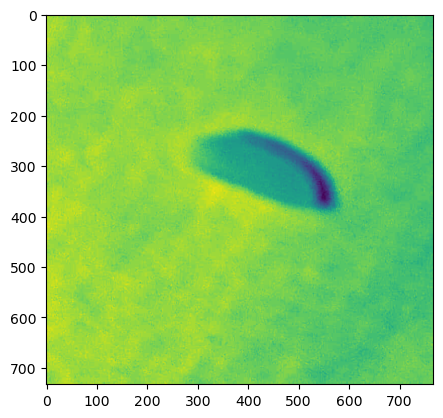

In [27]:
img = Image.open(r"./riceInput1.jpg").convert('L')
Prediction(img)

99.80841875076294% Confidence Jasmine


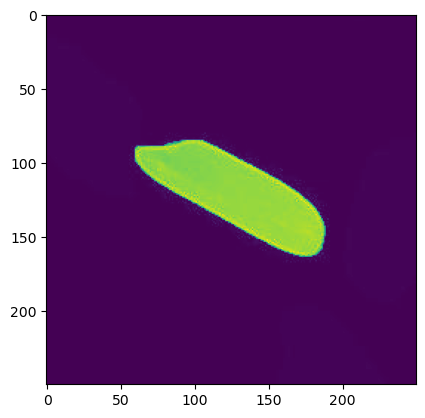

In [24]:
img = Image.open(r"./riceInput2.jpg").convert('L')
Prediction(img)

99.98759031295776% Confidence Arborio


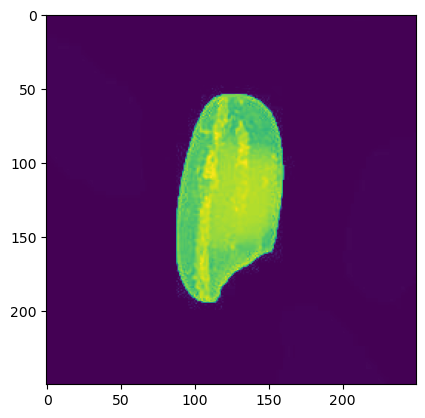

In [25]:
img = Image.open(r"./riceInput3.jpg").convert('L')
Prediction(img)